In [12]:
## Instalowanie modułów

!pip3 install --upgrade pip

!pip3 install -U gym
!pip3 install -U numpy
!pip3 install -U matplotlib
!pip3 install -U pandas
!pip3 install -U jinja2

In [13]:
## Importowanie modułów

import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from collections import deque


In [14]:
## Implementacja algorytmu Q-learning

def q_learning(env, alpha, gamma, epsilon, episodes, max_steps, boltzmann=False, T=1.0):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    
    for episode in range(episodes):
        state, _ = env.reset()
        total_rewards = 0
        for step in range(max_steps):
            if boltzmann:
                exp_values = np.exp(q_table[state] / T)
                probabilities = exp_values / np.sum(exp_values)
                action = np.random.choice(np.arange(len(probabilities)), p=probabilities)
            else:
                if np.random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample()  # Exploracja
                else:
                    action = np.argmax(q_table[state])  # Eksploatacja
            
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_rewards += reward
            
            best_next_action = np.argmax(q_table[next_state])
            td_target = reward + gamma * q_table[next_state][best_next_action]
            td_error = td_target - q_table[state][action]
            q_table[state][action] += alpha * td_error
            
            state = next_state
            
            if terminated or truncated:
                break
        
        rewards.append(total_rewards)
    
    return q_table, rewards



In [15]:
## Przebieg eksperymentu

# Params: alpha, gamma, epsilon, T jako bolztmann
def run_experiments(env, params, episodes=1000, max_steps=100, boltzmann=False):
    results = {}
    for param_name, param_values in params.items():
        results[param_name] = []
        for value in param_values:
            if param_name == 'alpha':
                q_table, rewards = q_learning(env, alpha=value, gamma=0.99, epsilon=0.1, episodes=episodes, max_steps=max_steps, boltzmann=boltzmann)
            elif param_name == 'gamma':
                q_table, rewards = q_learning(env, alpha=0.1, gamma=value, epsilon=0.1, episodes=episodes, max_steps=max_steps, boltzmann=boltzmann)
            elif param_name == 'epsilon':
                q_table, rewards = q_learning(env, alpha=0.1, gamma=0.99, epsilon=value, episodes=episodes, max_steps=max_steps, boltzmann=boltzmann)
            elif param_name == 'T':
                q_table, rewards = q_learning(env, alpha=0.1, gamma=0.99, epsilon=0.1, episodes=episodes, max_steps=max_steps, boltzmann=True, T=value)
            results[param_name].append((value, rewards))
    return results


In [16]:
##  Wyświetlanie wyników

def plot_results(results, param_name):
    plt.figure(figsize=(12, 8))
    for value, rewards in results[param_name]:
        plt.plot(rewards, label=f'{param_name} = {value}')
    plt.xlabel('Episodes')
    plt.ylabel('Total Rewards')
    plt.legend()
    plt.title(f'Impact of {param_name} on Learning Convergence')
    plt.show()

def summarize_results(results, param_name):
    summary = []
    for value, rewards in results[param_name]:
        mean_reward = np.mean(rewards[-10:])
        std_reward = np.std(rewards[-10:])
        success_rate = sum(reward > 0 for reward in rewards[-10:]) / 10
        summary.append((value, mean_reward, std_reward, success_rate))
    return summary

def print_summary(summary, param_name):
    print(f'\nSummary for {param_name}:')
    print(f'{"Value":<10}{"Mean Reward":<15}{"Std Reward":<15}{"Success Rate":<15}')
    for value, mean_reward, std_reward, success_rate in summary:
        print(f'{value:<10}{mean_reward:<15}{std_reward:<15}{success_rate:<15}')


In [17]:
## Przeprowadzenie eksperymentów

env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)

params = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
    'gamma': [0.5, 0.7, 0.9, 0.95, 0.99],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.3],
    'T': [0.5, 1.0, 2.0, 5.0, 10.0]
}

results = run_experiments(params, episodes=1000, max_steps=100)


/Volumes/Dock/Git/WSI_24L/Zadanie6/zadanie6env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


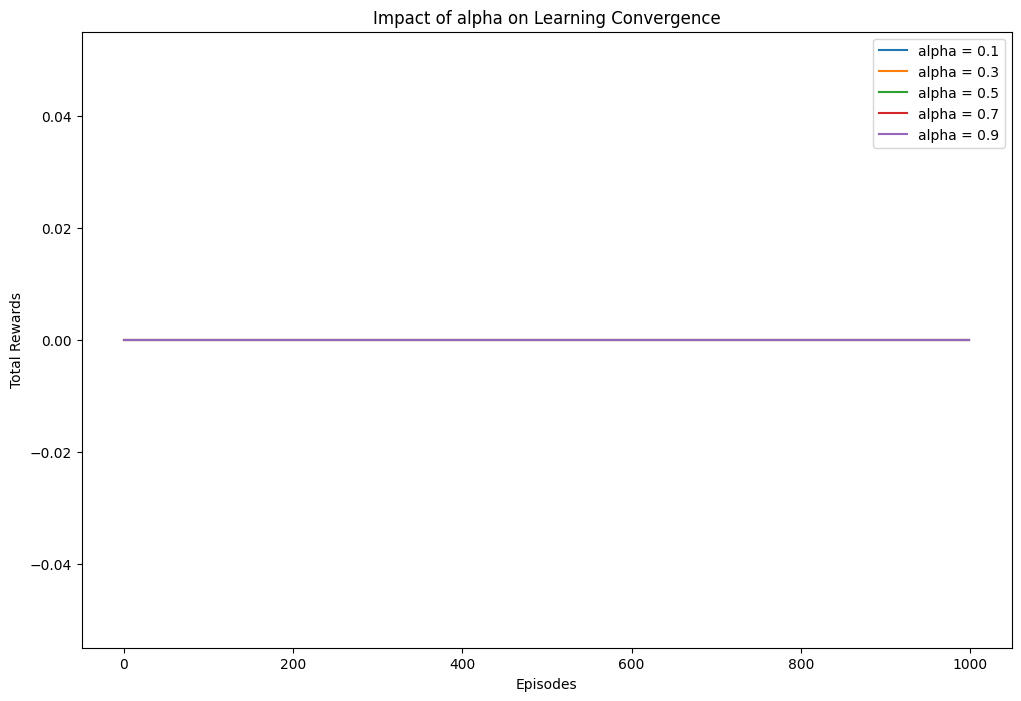


Summary for alpha:
Value     Mean Reward    Std Reward     Success Rate   
0.1       0.0            0.0            0.0            
0.3       0.0            0.0            0.0            
0.5       0.0            0.0            0.0            
0.7       0.0            0.0            0.0            
0.9       0.0            0.0            0.0            


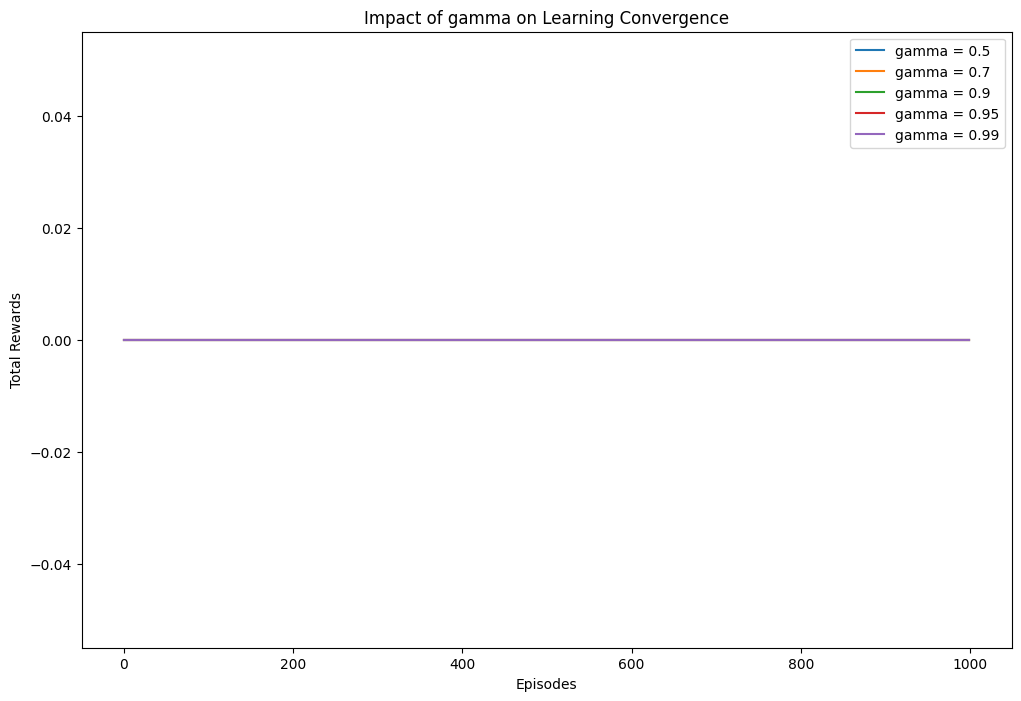


Summary for gamma:
Value     Mean Reward    Std Reward     Success Rate   
0.5       0.0            0.0            0.0            
0.7       0.0            0.0            0.0            
0.9       0.0            0.0            0.0            
0.95      0.0            0.0            0.0            
0.99      0.0            0.0            0.0            


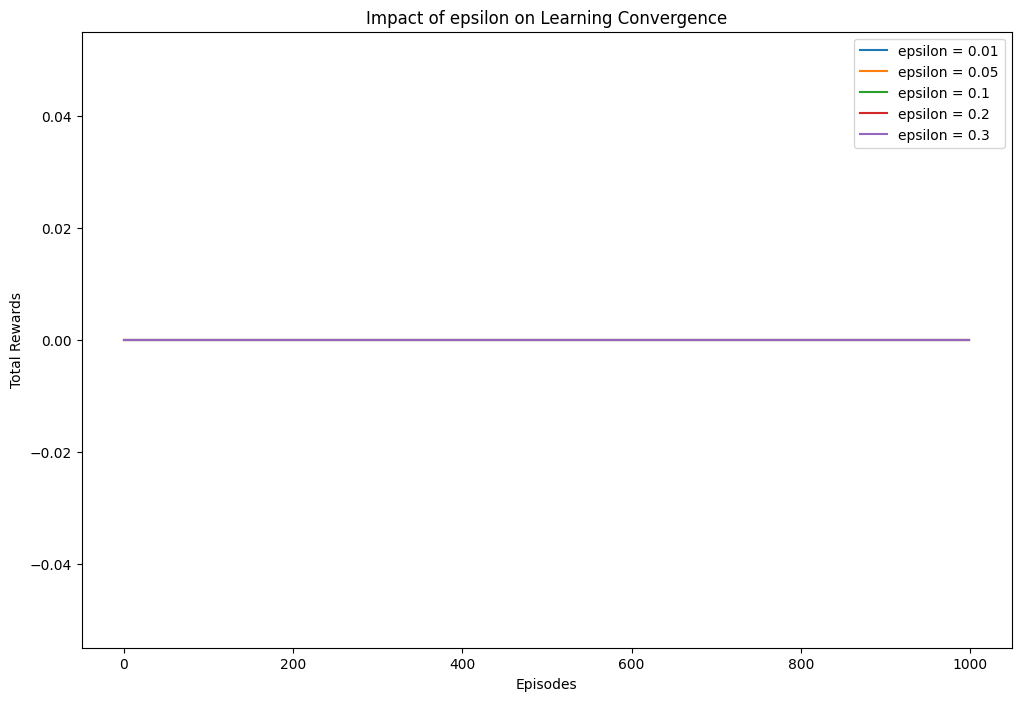


Summary for epsilon:
Value     Mean Reward    Std Reward     Success Rate   
0.01      0.0            0.0            0.0            
0.05      0.0            0.0            0.0            
0.1       0.0            0.0            0.0            
0.2       0.0            0.0            0.0            
0.3       0.0            0.0            0.0            


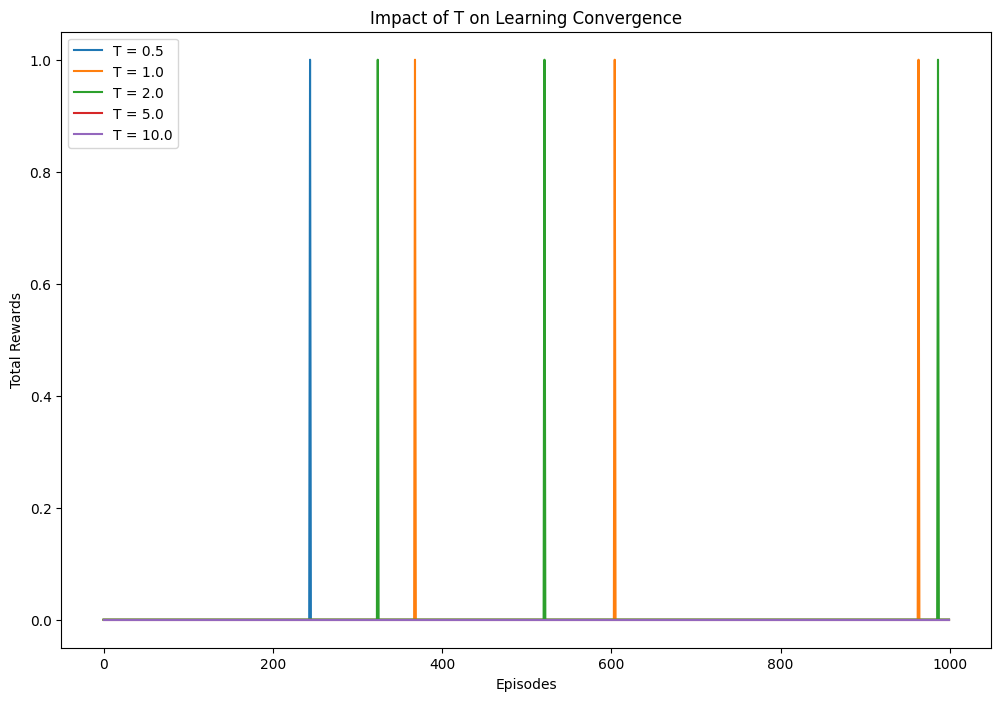


Summary for T:
Value     Mean Reward    Std Reward     Success Rate   
0.5       0.0            0.0            0.0            
1.0       0.0            0.0            0.0            
2.0       0.0            0.0            0.0            
5.0       0.0            0.0            0.0            
10.0      0.0            0.0            0.0            


In [18]:
## Wizualizacja wyników

for param_name in params.keys():
    plot_results(results, param_name)
    summary = summarize_results(results, param_name)
    print_summary(summary, param_name)


In [19]:
## Plotowanie do raportu

def results_to_latex(results, param_name):
    summary = summarize_results(results, param_name)
    df = pd.DataFrame(summary, columns=['Value', 'Mean Reward', 'Std Reward', 'Success Rate'])
    return df.to_latex(index=False)

for param_name in params.keys():
    print(results_to_latex(results, param_name))


\begin{tabular}{rrrr}
\toprule
Value & Mean Reward & Std Reward & Success Rate \\
\midrule
0.100000 & 0.000000 & 0.000000 & 0.000000 \\
0.300000 & 0.000000 & 0.000000 & 0.000000 \\
0.500000 & 0.000000 & 0.000000 & 0.000000 \\
0.700000 & 0.000000 & 0.000000 & 0.000000 \\
0.900000 & 0.000000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrr}
\toprule
Value & Mean Reward & Std Reward & Success Rate \\
\midrule
0.500000 & 0.000000 & 0.000000 & 0.000000 \\
0.700000 & 0.000000 & 0.000000 & 0.000000 \\
0.900000 & 0.000000 & 0.000000 & 0.000000 \\
0.950000 & 0.000000 & 0.000000 & 0.000000 \\
0.990000 & 0.000000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrr}
\toprule
Value & Mean Reward & Std Reward & Success Rate \\
\midrule
0.010000 & 0.000000 & 0.000000 & 0.000000 \\
0.050000 & 0.000000 & 0.000000 & 0.000000 \\
0.100000 & 0.000000 & 0.000000 & 0.000000 \\
0.200000 & 0.000000 & 0.000000 & 0.000000 \\
0.300000 & 0.000000 & 0.000000 & 0.000000 \